In [33]:
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import r
from rpy2.robjects import numpy2ri
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
r['load']('./datasets/ESL.mixture.rda')

'ESL.mixture'


In [13]:
ESL_mixture_data = r['ESL.mixture']

In [25]:
X = numpy2ri.ri2py(ESL_mixture[0])
y = numpy2ri.ri2py(ESL_mixture[1])

In [26]:
idx_0 = y == 0 
idx_1 = y == 1

In [27]:
A = X[idx_0]
B = X[idx_1]

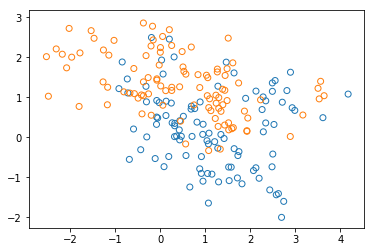

In [22]:
f,a = plt.subplots()
a.scatter(A[:,0], A[:,1], facecolor='None', edgecolor="C0")
a.scatter(B[:,0], B[:,1], facecolor='None', edgecolor="C1")

## Linear regression

In [73]:
lr = LinearRegression()

In [97]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [99]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

In [100]:
Z = Z.reshape(xx.shape)

In [101]:
Ax, Ay = xx[Z < 0.5],  yy[Z < 0.5]
Bx, By = xx[Z >= 0.5], yy[Z >= 0.5]

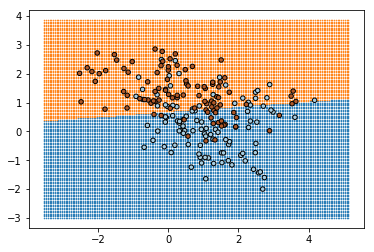

In [104]:
f,ax = plt.subplots()
ax.scatter(Ax, Ay, c='C0', s=0.3)
ax.scatter(Bx, By, c='C1', s=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired',
            edgecolor='k', s=20)

## Nearest-Neigbour classification

In [63]:
knn = KNeighborsClassifier(n_neighbors=15)

In [64]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [65]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [66]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [67]:
Z = Z.reshape(xx.shape)

In [68]:
np.c_

In [69]:
len(xx)

343

In [70]:
len(yy)

343

In [71]:
len(Z)

343

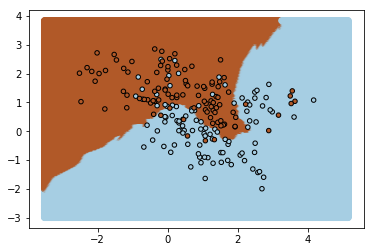

In [72]:
plt.figure()
plt.scatter(xx, yy, c=Z, cmap="Paired")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired',
            edgecolor='k', s=20)